In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd #importing library pandas as pd
import numpy as np
from scipy.stats import iqr
import os

In [31]:
df = pd.read_csv("H:/ATAD/Project/Melbourne_housing.csv") #reading csv file

In [32]:
df.head() #showing glance of data rows

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [33]:
df.info() #representing data column names and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [34]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [35]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [36]:
df["Primary"] = df["Suburb"] +":"+ df["Address"]
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Primary
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Abbotsford:68 Studley St
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,Abbotsford:85 Turner St
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,Abbotsford:25 Bloomburg St
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,Abbotsford:18/659 Victoria St
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,Abbotsford:5 Charles St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,Yarraville:13 Burns St
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,Yarraville:29A Murray St
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,Yarraville:147A Severn St
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,Yarraville:12/37 Stephen St


In [37]:
df_unique = df.Address.unique()
df_unique

array(['68 Studley St', '85 Turner St', '25 Bloomburg St', ...,
       '147A Severn St', '12/37 Stephen St', '3 Tarrengower St'],
      dtype=object)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [39]:
# df_long = pd.melt(df, id_vars = ["Regionname", "Address", "Suburb", "Method", "Rooms", "Type", "SellerG", "Date", "Distance",
#                                  "Postcode", "Bathroom" ])
df_long = pd.melt(df, id_vars =["Price", "Regionname"])
df_long

,Price,Regionname,variable,value
0,NaN,Northern Metropolitan,Suburb,Abbotsford
1,1480000.0,Northern Metropolitan,Suburb,Abbotsford
2,1035000.0,Northern Metropolitan,Suburb,Abbotsford
3,NaN,Northern Metropolitan,Suburb,Abbotsford
4,1465000.0,Northern Metropolitan,Suburb,Abbotsford
...,...,...,...,...
697135,1480000.0,Western Metropolitan,Primary,Yarraville:13 Burns St
697136,888000.0,Western Metropolitan,Primary,Yarraville:29A Murray St
697137,705000.0,Western Metropolitan,Primary,Yarraville:147A Severn St
697138,1140000.0,Western Metropolitan,Primary,Yarraville:12/37 Stephen St


In [40]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697140 entries, 0 to 697139
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Price       544940 non-null  float64
 1   Regionname  697080 non-null  object 
 2   variable    697140 non-null  object 
 3   value       603778 non-null  object 
dtypes: float64(1), object(3)
memory usage: 21.3+ MB


In [41]:
mean = df['Price'].mean()
print(mean)

1050173.344955408


In [42]:
std_dev = df['Price'].std()
print(std_dev)

641467.1301046001


In [43]:
median = df['Price'].median()
print(median)

870000.0


Text(0.5, 1.0, 'Box Plot To SHow Outliers')

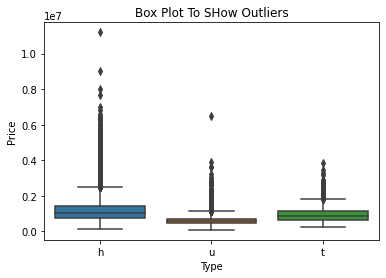

In [44]:
plt_outlier = sns.boxplot(x='Type', y='Price', data=df, orient="v")
plt.title("Box Plot To SHow Outliers")

In [45]:
q1 = df['Price'].quantile(0.25)
print(q1)
q3 = df['Price'].quantile(0.75)
print(q3)
inter_quantile = q3-q1
print(inter_quantile)

635000.0
1295000.0
660000.0


In [46]:
upper_bound = q3+(1.5*inter_quantile)
lower_bound = q1-(1.5*inter_quantile)
print(upper_bound, lower_bound)

2285000.0 -355000.0


<AxesSubplot:xlabel='Type', ylabel='Price'>

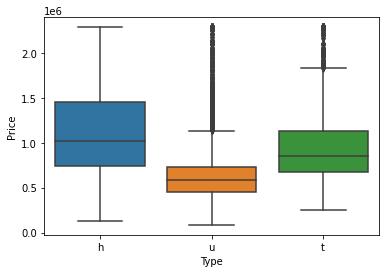

In [47]:
#Removed outliers from dataset
df['Price'] = df['Price'].clip(lower_bound, upper_bound)
sns.boxplot(x='Type', y='Price', data=df, orient="v")

In [48]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Primary              0
dtype: int64

**Data Cleaning & Transformation**

In [3]:
df = pd.read_csv("H:/ATAD/Project/Melbourne_housing.csv") #reading csv file

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
df["Primary"] = df["Suburb"] +":"+ df["Address"]
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Primary
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Abbotsford:68 Studley St
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,Abbotsford:85 Turner St
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,Abbotsford:25 Bloomburg St
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,Abbotsford:18/659 Victoria St
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,Abbotsford:5 Charles St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,Yarraville:13 Burns St
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,Yarraville:29A Murray St
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,Yarraville:147A Severn St
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,Yarraville:12/37 Stephen St


In [6]:
df.isnull().sum()#count of null values in each column


Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Primary              0
dtype: int64

<AxesSubplot:>

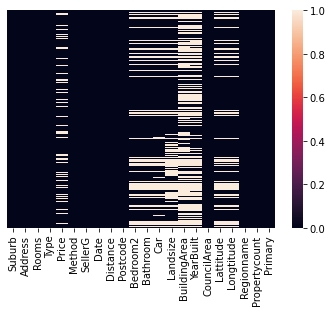

In [7]:
sns.heatmap(df.isnull(), yticklabels = False) #detecting missing values in data

In [8]:
#remove missing values from data
df = df.dropna()

In [9]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Primary          0
dtype: int64

In [10]:
#drop duplicate rows
df_filtered = df.drop_duplicates(subset ="Primary", keep=False)
df_filtered.nunique()

Suburb            315
Address          8677
Rooms              10
Type                3
Price            1834
Method              5
SellerG           249
Date               77
Distance          201
Postcode          194
Bedroom2           12
Bathroom            9
Car                11
Landsize         1233
BuildingArea      590
YearBuilt         143
CouncilArea        33
Lattitude        5613
Longtitude       6010
Regionname          8
Propertycount     312
Primary          8709
dtype: int64

In [11]:
#drop columns
df = df.drop(['Postcode', 'Lattitude', 'Longtitude', 'Propertycount'], axis=1)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Primary
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,Abbotsford:25 Bloomburg St
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,Abbotsford:5 Charles St
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/6/2016,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,Northern Metropolitan,Abbotsford:55a Park St
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/5/2016,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,Northern Metropolitan,Abbotsford:124 Yarra St
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,Northern Metropolitan,Abbotsford:98 Charles St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,24/02/2018,25.5,3.0,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,Northern Metropolitan,Wollert:27 Birchmore Rd
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,24/02/2018,25.5,3.0,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,Northern Metropolitan,Wollert:35 Kingscote Wy
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,Western Metropolitan,Yarraville:29A Murray St
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,Western Metropolitan,Yarraville:147A Severn St


In [12]:
df = df.rename(columns={"Type": "Type Of Property", "SellerG": "Seller Name", "Suburb": "Outskirts Area"})
df

,Outskirts Area,Address,Rooms,Type Of Property,Price,Method,Seller Name,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Primary
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,Abbotsford:25 Bloomburg St
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,Abbotsford:5 Charles St
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/6/2016,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,Northern Metropolitan,Abbotsford:55a Park St
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/5/2016,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,Northern Metropolitan,Abbotsford:124 Yarra St
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,Northern Metropolitan,Abbotsford:98 Charles St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,24/02/2018,25.5,3.0,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,Northern Metropolitan,Wollert:27 Birchmore Rd
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,24/02/2018,25.5,3.0,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,Northern Metropolitan,Wollert:35 Kingscote Wy
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,Western Metropolitan,Yarraville:29A Murray St
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,Western Metropolitan,Yarraville:147A Severn St


In [13]:
df['Date'] =  pd.to_datetime(df['Date'])

In [14]:
df

,Outskirts Area,Address,Rooms,Type Of Property,Price,Method,Seller Name,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Primary
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,Abbotsford:25 Bloomburg St
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,Abbotsford:5 Charles St
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,Northern Metropolitan,Abbotsford:55a Park St
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,Northern Metropolitan,Abbotsford:124 Yarra St
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-08-10,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,Northern Metropolitan,Abbotsford:98 Charles St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,2018-02-24,25.5,3.0,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,Northern Metropolitan,Wollert:27 Birchmore Rd
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,2018-02-24,25.5,3.0,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,Northern Metropolitan,Wollert:35 Kingscote Wy
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,Western Metropolitan,Yarraville:29A Murray St
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,Western Metropolitan,Yarraville:147A Severn St


In [17]:
df['YearBuilt'] = pd. DatetimeIndex(df['Date']).year
df['YearBuilt'] = pd. DatetimeIndex(df['Date']).year
df

,Outskirts Area,Address,Rooms,Type Of Property,Price,Method,Seller Name,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Primary,Year Of Sell
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,2.0,1.0,0.0,156.0,79.0,2016,Yarra City Council,Northern Metropolitan,Abbotsford:25 Bloomburg St,2016
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3.0,2.0,0.0,134.0,150.0,2017,Yarra City Council,Northern Metropolitan,Abbotsford:5 Charles St,2017
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3.0,1.0,2.0,120.0,142.0,2016,Yarra City Council,Northern Metropolitan,Abbotsford:55a Park St,2016
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05,2.5,4.0,2.0,0.0,245.0,210.0,2016,Yarra City Council,Northern Metropolitan,Abbotsford:124 Yarra St,2016
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-08-10,2.5,2.0,1.0,2.0,256.0,107.0,2016,Yarra City Council,Northern Metropolitan,Abbotsford:98 Charles St,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,2018-02-24,25.5,3.0,2.0,2.0,383.0,118.0,2018,Whittlesea City Council,Northern Metropolitan,Wollert:27 Birchmore Rd,2018
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,2018-02-24,25.5,3.0,2.0,2.0,404.0,158.0,2018,Whittlesea City Council,Northern Metropolitan,Wollert:35 Kingscote Wy,2018
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,2.0,2.0,1.0,98.0,104.0,2018,Maribyrnong City Council,Western Metropolitan,Yarraville:29A Murray St,2018
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,2.0,1.0,2.0,220.0,120.0,2018,Maribyrnong City Council,Western Metropolitan,Yarraville:147A Severn St,2018


In [18]:
df.to_csv("cleaned_file.csv")